# Homework– Churn Prediction

**02/19/2019**

**Mengheng Xue**

### Data Preprocessing 

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Week3_Mocked_Customer_Data_With_Missing.csv')
dataset.head(5)

,cust_id,churn_flag,gender,marrital,age,home_owner,num_cont,tot_bill,tot_call,tot_bal,fortune,tot_bytes,tot_air,num_out,google_bytes,google_air,yahoo_bytes,yahoo_air
0,c000001,1,Male,divorced,49.0,0,0,134.130817,53,4973.07,Mass,931.28,3046.90,194,320.52,1270.23,194.04,710.45
1,c000002,1,Male,divorced,33.0,0,1,121.247165,68,4528.01,Low,580.62,3549.74,331,491.50,1484.64,32.14,823.42
2,c000003,1,Female,divorced,38.0,0,1,164.144198,38,5565.09,Affluent,754.07,2996.59,139,283.24,764.69,182.07,718.69
3,c000004,1,Female,married,26.0,1,1,177.394137,80,5370.00,Affluent,384.81,2443.78,98,384.81,721.44,145.09,742.61
4,c000005,0,Male,single,55.0,0,2,155.183919,50,5101.25,Affluent,15.30,2576.98,294,15.30,774.92,15.30,710.88


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022299E3DB38>,
      dtype=object)

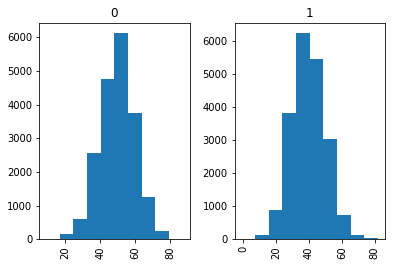

In [3]:
# Plot histograms of “age” group by “churn”
dataset['age'].hist(by=dataset['churn_flag'])

In [4]:
# separete independent and dependent variables 
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, 1].values

# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])

In [7]:
# t-test of “tot_bill” regarding “churn”
from scipy.stats import ttest_ind
tot_bill = X[:, 5]
t_test, p_value = ttest_ind(tot_bill, y)
print('t-test index = {}\np-value = {}'.format(t_test, p_value))

t-test index = 693.6014709665144
p-value = 0.0


In [8]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0]) # gender
labelencoder_X_2 = LabelEncoder()
X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1]) # marrital
labelencoder_X_3 = LabelEncoder()
X[:, 8] = labelencoder_X_3.fit_transform(X[:, 8].astype(str)) # fortune
onehotencoder = OneHotEncoder(categorical_features = [0, 1, 8])
X = onehotencoder.fit_transform(X).toarray()
# Avoid dummy variable trap
X = np.delete(X, 2, axis=1) # delete dummy variable for marrital 
X = np.delete(X, 4, axis=1) # delete dummy variable for fortune

C:\Users\mengh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\mengh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) 

In [11]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 6) # components with variance larger than 0.05
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance.round(4))

[0.2197 0.1112 0.0839 0.083  0.0539 0.0527]


### Traning and Testing Logistic Model 

In [12]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\mengh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Evaluation of LR Model
From confusion matrix, we could see that we predict most of y on the test set correctly (TP and TN), which means our model is well performed. 

In [14]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: ")
print(cm)

confusion matrix: 
[[4533  326]
 [ 405 4736]]


In [15]:
# Compute precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, pos_label=1)
print("precision = %0.3f" % precision)

precision = 0.936


In [16]:
# Compute recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, pos_label=1)
print("recall = %0.3f" % recall)

recall = 0.921


In [17]:
# Compute F1 score 
from sklearn.metrics import f1_score
F1 = f1_score(y_test, y_pred, pos_label=1)
print("F1 = %0.3F" % F1)

F1 = 0.928


### Precision-Recall Curve and ROC Curve
We can see that  AUC of both Precision-Recall curve and ROC curve  lager than 0.9, which shows our logistic model is well performed. 

Area Under Curve: 0.95


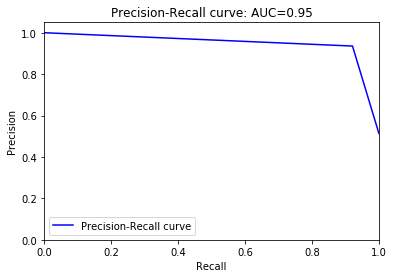

In [18]:
# Compute Precision-Recall and plot curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label=1)
area = auc(recall, precision)
print("Area Under Curve: %0.2f" % area)

plt.clf()
plt.plot(recall, precision, 'b-', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC=%0.2f' % area)
plt.legend(loc="lower left")
plt.show()

In [22]:
# Compute ROC curve AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=1)

roc_auc = auc(fpr, tpr)
print('ROC AUC = {}'.format(roc_auc))

ROC AUC = 0.9270647789948478


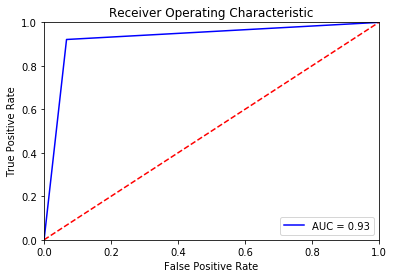

In [23]:
# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Summary
### Comparsion Using different data transforming
We use different data transformation techniques to improve prediction performance. The outcomes are displayed in the following table. We can see that: 
+ Generally, our logistic model performs very well, obtaining both precision and recall larger than 0.9 on the test set.  
+ We use normalization then PCA to improve the performance. However, it  does not change so much.  We think the raw data features are already well structured features and obtain excellent results, there is limited room to improve the performance by data transformation. 
+ We only discuss the performance of our model in terms of prediction accuracy here. We think data transformation is more important in terms of time cost of training, which will make gradient decent faster than we only use the raw data. Here, however, since our data size is relatively small and well structured (relatively close, no extreme outliers), it may be not obvious that the model is faster when we apply data transformation. 

| data transform | Precision | Recall | F1 score |
| --- | --- | --- | --- |
| raw data | 0.932 | 0.917 | 0.925 |
| normalize | 0.934 | 0.922 | 0.928 |
| PCA | 0.936 | 0.921 | 0.928 |



